In [108]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

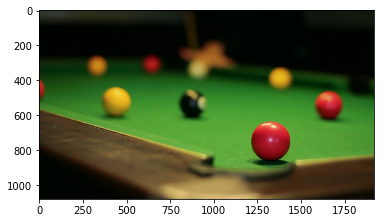

In [109]:
path = './sample/3.jpg'
img = cv2.imread(path)
img = cv2.GaussianBlur(img,(5,5),0)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [110]:
#default setting for red
#lower_red=np.array([0, 50, 50])
#upper_red=np.array([10, 255, 255])

lower_red=np.array([169, 100, 100])             
upper_red=np.array([189, 255, 255])

mask_red=cv2.inRange(hsv,lower_red,upper_red)
res_red=cv2.bitwise_and(img,img,mask=mask_red)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


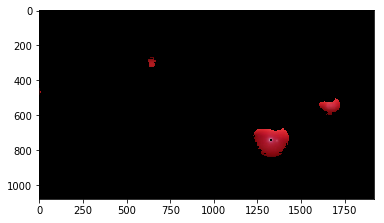

In [111]:
plt.imshow(res_red)
#print res_red[100:110, 100:110]
print mask_red[100:110, 100:110]
arr = np.array(mask_red)

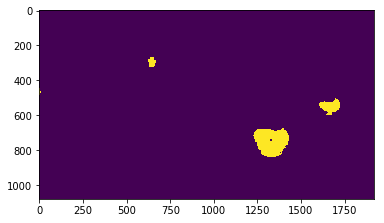

In [112]:
kernel = np.ones((7,7), np.uint8)
img_dilation = cv2.dilate(mask_red, kernel, iterations=1)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
plt.imshow(img_erosion)


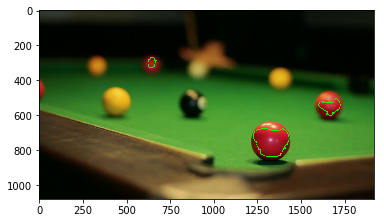

In [113]:
imgray = img_erosion
ret,thresh = cv2.threshold(imgray,10,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours_ = []
points = []
for c in contours:
    if cv2.contourArea(c) >= 500 :
        contours_.append(c)
cv2.drawContours(img, contours_, -1, (0,255,0), 3)
plt.imshow(img)

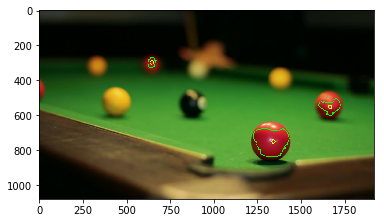

In [114]:
#points = np.argwhere(mask_red)
points = np.array(contours_)
center = []
for i in range(0, np.size(contours_)):
    x = int(np.mean(points[i][:,0,0]))
    y = int(np.mean(points[i][:,0,1]))
    cv2.circle(img, (x, y),10,(255,255,0),3,1)

plt.imshow(img)